## Web Scraping + Image Processing

In [10]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re 
import time
import cv2
import matplotlib.pyplot as plt

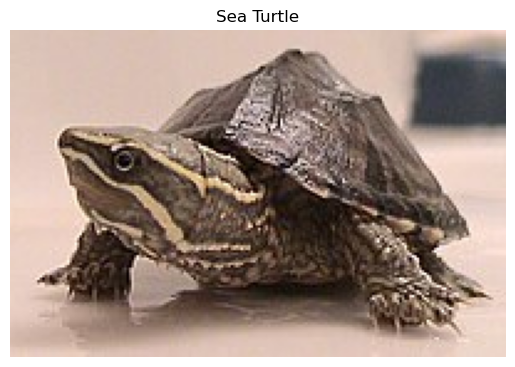

In [12]:
base_url = "https://www.scrapethissite.com/pages/frames/"
outer_url = base_url + "/pages/frames/"

img_url = "https://upload.wikimedia.org/wikipedia/commons/thumb/5/5e/Sternotherus_odoratus.jpg/200px-Sternotherus_odoratus.jpg"
response = requests.get(img_url)
if response.status_code == 200:
    image_array = np.asarray(bytearray(response.content), dtype=np.uint8)
    image = cv2.imdecode(image_array, cv2.IMREAD_COLOR)
    cv2.imwrite("sea_turtle.jpg", image)

    
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image_rgb)
    plt.title("Sea Turtle")
    plt.axis('off')
    plt.show()
else:
    print("Failed to download image.")

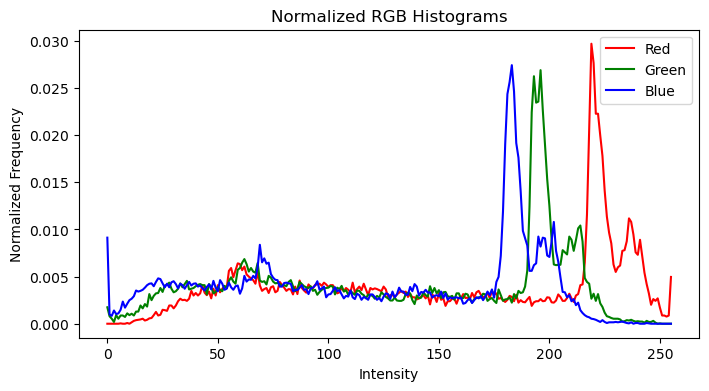

In [13]:
# Load image in RGB
img = cv2.imread("sea_turtle.jpg")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Split channels
r, g, b = cv2.split(img_rgb)

# Compute normalized histograms
hist_r = cv2.calcHist([r], [0], None, [256], [0, 256])
hist_g = cv2.calcHist([g], [0], None, [256], [0, 256])
hist_b = cv2.calcHist([b], [0], None, [256], [0, 256])

# Normalize
hist_r /= hist_r.sum()
hist_g /= hist_g.sum()
hist_b /= hist_b.sum()

# Combined histogram
plt.figure(figsize=(8, 4))
plt.plot(hist_r, color='red', label='Red')
plt.plot(hist_g, color='green', label='Green')
plt.plot(hist_b, color='blue', label='Blue')
plt.title("Normalized RGB Histograms")
plt.xlabel("Intensity")
plt.ylabel("Normalized Frequency")
plt.legend()
plt.show()

In [14]:
c = 255 / np.log(1 + img_rgb.max())
log_img = (c * np.log1p(img_rgb)).astype(np.uint8)

C:\Users\bbuser\AppData\Local\Temp\ipykernel_12372\2254919155.py:1: RuntimeWarning: overflow encountered in scalar add
  c = 255 / np.log(1 + img_rgb.max())
C:\Users\bbuser\AppData\Local\Temp\ipykernel_12372\2254919155.py:1: RuntimeWarning: divide by zero encountered in log
  c = 255 / np.log(1 + img_rgb.max())


In [15]:
gamma_img1 = ((img_rgb / 255.0) ** 0.5 * 255).astype(np.uint8)
gamma_img2 = ((img_rgb / 255.0) ** 2.0 * 255).astype(np.uint8)

In [16]:
in_min, in_max = 50, 200  # example ranges
stretch_img = np.clip((img_rgb - in_min) * (255 / (in_max - in_min)), 0, 255).astype(np.uint8)

In [17]:
eq_r = cv2.equalizeHist(r)
eq_g = cv2.equalizeHist(g)
eq_b = cv2.equalizeHist(b)
eq_rgb = cv2.merge([eq_r, eq_g, eq_b])

In [18]:
ycrcb = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2YCrCb)
y, Cr, Cb = cv2.split(ycrcb)
y_eq = cv2.equalizeHist(y)
ycrcb_eq = cv2.merge([y_eq, Cr, Cb])
eq_lum_rgb = cv2.cvtColor(ycrcb_eq, cv2.COLOR_YCrCb2RGB)

In [19]:
import matplotlib.pyplot as plt

def plot_image(images, titles, cmap=None, rows=1):
    cols = len(images) // rows + (len(images) % rows > 0)
    plt.figure(figsize=(5 * cols, 4 * rows))
    for i, (img, title) in enumerate(zip(images, titles)):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(img, cmap=cmap)
        plt.title(title)
        plt.axis("off")
    plt.tight_layout()
    plt.show()

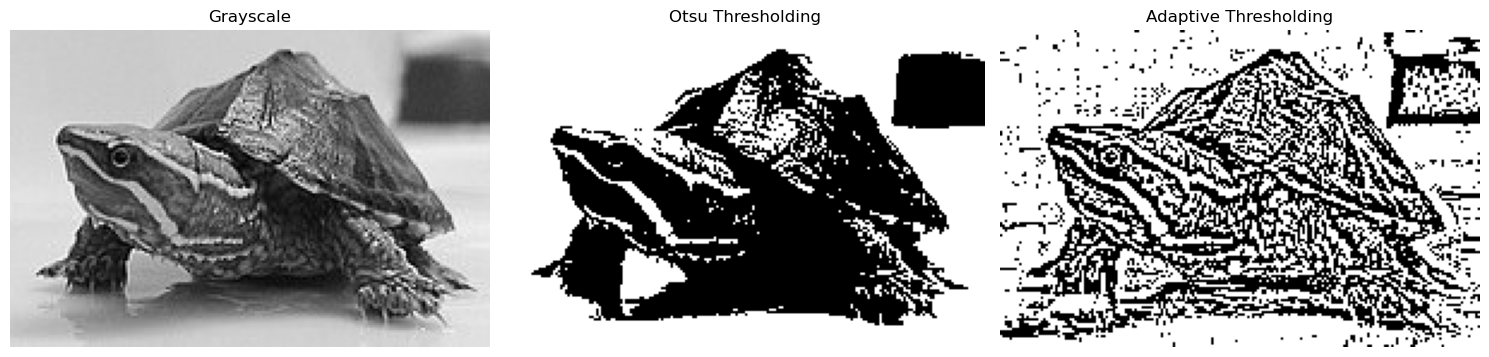

In [20]:
gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)

# Otsu’s Thresholding
_, otsu = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Adaptive Thresholding
adaptive = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                 cv2.THRESH_BINARY, 11, 2)

plot_image([gray, otsu, adaptive],
           ["Grayscale", "Otsu Thresholding", "Adaptive Thresholding"],
           cmap='gray')

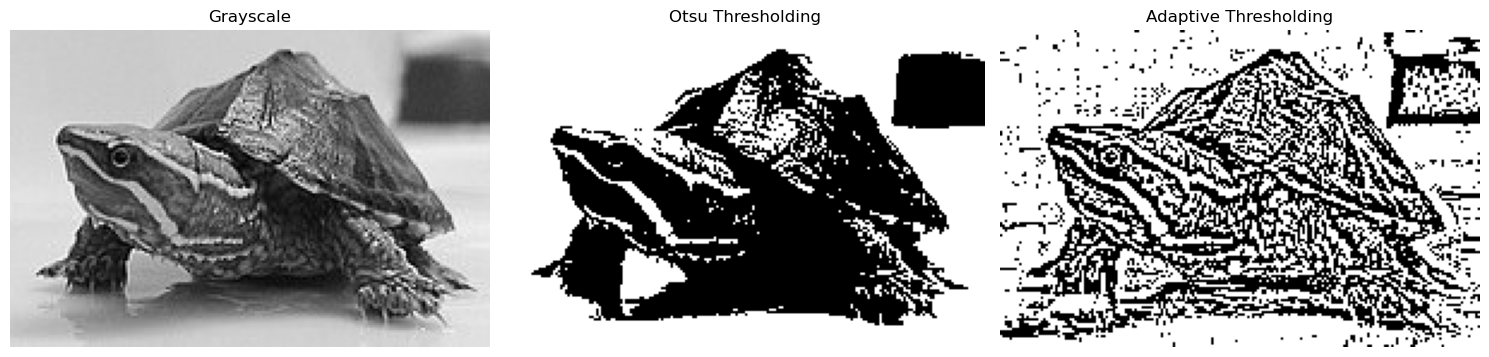

In [21]:
gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)

# Otsu’s Thresholding
_, otsu = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Adaptive Thresholding
adaptive = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                 cv2.THRESH_BINARY, 11, 2)

plot_image([gray, otsu, adaptive],
           ["Grayscale", "Otsu Thresholding", "Adaptive Thresholding"],
           cmap='gray')

## Task Is Done